# ETL and EDA
---

## Libraries

In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

import warnings 
warnings.filterwarnings("ignore")

import re

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(palette="muted")

from scipy.stats import zscore

---
## Load data
There are 375 unique ids on each file. 

In [2]:
df_salary = pd.read_csv('..\\datasets\\1. Original Dataset\\salary.csv')
df_salary.info()
df_salary.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      375 non-null    int64  
 1   Salary  373 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.0 KB


,id,Salary
0,0,90000.0
1,1,65000.0
2,2,150000.0
3,3,60000.0
4,4,200000.0


In [3]:
df_salary.describe()

,id,Salary
count,375.000000,373.000000
mean,187.000000,100577.345845
std,108.397417,48240.013482
min,0.000000,350.000000
25%,93.500000,55000.000000
50%,187.000000,95000.000000
75%,280.500000,140000.000000
max,374.000000,250000.000000


In [4]:
df_description = pd.read_csv('..\\datasets\\1. Original Dataset\\descriptions.csv')
df_description.info()
df_description.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           375 non-null    int64 
 1   Description  372 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.0+ KB


,id,Description
0,0,I am a 32-year-old male working as a Software ...
1,1,I am a 28-year-old data analyst with a Master'...
2,2,I am a 45-year-old Senior Manager with a PhD a...
3,3,I am a 36-year-old female Sales Associate with...
4,4,I am a 52-year-old male with over two decades ...


In [5]:
df_description.describe()

,id
count,375.000000
mean,187.000000
std,108.397417
min,0.000000
25%,93.500000
50%,187.000000
75%,280.500000
max,374.000000


In [6]:
df_people = pd.read_csv('..\\datasets\\1. Original Dataset\\people.csv')
df_people.info()
df_people.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   375 non-null    int64  
 1   Age                  370 non-null    float64
 2   Gender               370 non-null    object 
 3   Education Level      370 non-null    object 
 4   Job Title            370 non-null    object 
 5   Years of Experience  373 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 17.7+ KB


,id,Age,Gender,Education Level,Job Title,Years of Experience
0,0,32.0,Male,Bachelor's,Software Engineer,5.0
1,1,28.0,Female,Master's,Data Analyst,3.0
2,2,45.0,Male,PhD,Senior Manager,15.0
3,3,36.0,Female,Bachelor's,Sales Associate,7.0
4,4,52.0,Male,Master's,Director,20.0


In [7]:
df_people.describe()

,id,Age,Years of Experience
count,375.000000,370.000000,373.000000
mean,187.000000,37.437838,10.030831
std,108.397417,7.080465,6.557007
min,0.000000,23.000000,0.000000
25%,93.500000,31.250000,4.000000
50%,187.000000,36.000000,9.000000
75%,280.500000,44.000000,15.000000
max,374.000000,53.000000,25.000000


Merge data

In [8]:
df = df_people.merge(df_salary, on='id', how='left').merge(df_description, on='id', how='left')

---
## Minimal Profile Report
- There are no duplicated or missing ids.
- Very few missing values.
- There are not outliers for numerical variables.
- Age, Education Level and Years of Experience are highly correlated with Salary.

In [9]:
# profile = ProfileReport(df, title="EDA Report - Salary Dataset", explorative=True)
# profile.to_file("EDA_Report_Salary.html")
# profile.to_notebook_iframe()

---
## Missing Values

- Two rows with missing values for every field (except **`id`** and **`Description`**)

In [10]:
df_missing = df[df.isna().any(axis=1)]
df_missing

,id,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Description
51,51,33.0,Male,Master's,NaN,7.0,85000.0,I am a 33-year-old Business Intelligence Analy...
60,60,51.0,Female,Master's,NaN,23.0,170000.0,I am a 51-year-old female with a Master's degr...
111,111,37.0,Male,Bachelor's,Software Project Manager,9.0,95000.0,NaN
125,125,26.0,Male,Bachelor's,Junior Accountant,2.0,40000.0,NaN
139,139,43.0,Female,NaN,Senior Product Marketing Manager,14.0,120000.0,I am a 43-year-old Senior Product Marketing Ma...
172,172,NaN,NaN,NaN,NaN,NaN,NaN,"As an employee, I bring a wealth of diverse ex..."
177,177,31.0,Male,Bachelor's,Junior Accountant,4.0,50000.0,NaN
219,219,40.0,NaN,Bachelor's,Senior Sales Representative,12.0,100000.0,I am a 40-year-old Senior Sales Representative...
221,221,NaN,Female,Bachelor's,Junior Social Media Specialist,3.0,45000.0,I am a 31-year-old female currently working as...
225,225,40.0,NaN,Bachelor's,Senior Marketing Manager,11.0,105000.0,I am a 40-year-old Senior Marketing Manager wi...


In [11]:
null_rows_count = df.drop(columns=['id', 'Description'], errors='ignore').isnull().all(axis=1).sum()
print(null_rows_count)

2


- We fill missing values of Job Titles, Gender, Age and Education Level with information from the Description. 

In [12]:
df_missing_jobs_titles = df[df['Job Title'].isna()]
df_missing_jobs_titles

,id,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Description
51,51,33.0,Male,Master's,NaN,7.0,85000.0,I am a 33-year-old Business Intelligence Analy...
60,60,51.0,Female,Master's,NaN,23.0,170000.0,I am a 51-year-old female with a Master's degr...
172,172,NaN,NaN,NaN,NaN,NaN,NaN,"As an employee, I bring a wealth of diverse ex..."
260,260,NaN,NaN,NaN,NaN,NaN,NaN,"As an employee, I bring a unique blend of skil..."
332,332,45.0,Female,PhD,NaN,16.0,160000.0,I am a 45-year-old Senior UX Designer with a P...


In [13]:
# Manualy replacement for specific IDs according to Job Description
manual_replacements = {
    51: "Business Intelligence Analyst",
    60: "Director of Operations",
    332: "Senior UX Designer"
}

# Apply replacements only where Job Title is NaN
df.loc[df['id'].isin(manual_replacements.keys()), 'Job Title'] = df['id'].map(manual_replacements)

In [14]:
# Function to extract Age
def extract_age(description):
    if pd.isna(description):
        return np.nan 
    match = re.search(r'I am a (\d+)-year-old', description, re.IGNORECASE)
    return int(match.group(1)) if match else np.nan

# Function to extract Gender
def extract_gender(description):
    if pd.isna(description):
        return np.nan
    match = re.search(r'(Male|Female)', description, re.IGNORECASE)
    return match.group(1).capitalize() if match else np.nan

# Function to extract Education Level
def extract_education(description):
    if pd.isna(description):
        return np.nan
    match = re.search(r"(Bachelor's|Master's|PhD)", description, re.IGNORECASE)
    return match.group(1) if match else np.nan

# Apply functions only where values are missing
df.loc[df['Age'].isna(), 'Age'] = df['Description'].apply(extract_age)
df.loc[df['Gender'].isna(), 'Gender'] = df['Description'].apply(extract_gender)
df.loc[df['Education Level'].isna(), 'Education Level'] = df['Description'].apply(extract_education)

In [15]:
# Show missing values
df_missing = df[df.isna().any(axis=1)]
df_missing

,id,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Description
111,111,37.0,Male,Bachelor's,Software Project Manager,9.0,95000.0,NaN
125,125,26.0,Male,Bachelor's,Junior Accountant,2.0,40000.0,NaN
172,172,NaN,NaN,NaN,NaN,NaN,NaN,"As an employee, I bring a wealth of diverse ex..."
177,177,31.0,Male,Bachelor's,Junior Accountant,4.0,50000.0,NaN
219,219,40.0,NaN,Bachelor's,Senior Sales Representative,12.0,100000.0,I am a 40-year-old Senior Sales Representative...
225,225,40.0,NaN,Bachelor's,Senior Marketing Manager,11.0,105000.0,I am a 40-year-old Senior Marketing Manager wi...
235,235,32.0,NaN,Bachelor's,Junior Sales Representative,3.0,45000.0,As a 32-year-old Junior Sales Representative w...
260,260,NaN,NaN,NaN,NaN,NaN,NaN,"As an employee, I bring a unique blend of skil..."
287,287,NaN,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0,As a 35-year-old Senior Marketing Analyst with...
315,315,NaN,Male,Bachelor's,Senior Software Engineer,13.0,130000.0,I am a Senior Software Engineer with 13 years ...


In [16]:
# Drop rows where any field is null (except id and Description)
df = df.dropna(subset=[col for col in df.columns if (col != 'id' and col != 'Description')], how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368 entries, 0 to 374
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   368 non-null    int64  
 1   Age                  368 non-null    float64
 2   Gender               368 non-null    object 
 3   Education Level      368 non-null    object 
 4   Job Title            368 non-null    object 
 5   Years of Experience  368 non-null    float64
 6   Salary               368 non-null    float64
 7   Description          365 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 25.9+ KB


As a result, only 3 rows have Description as missing values.

In [17]:
df_missing = df[df.isna().any(axis=1)]
df_missing

,id,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Description
111,111,37.0,Male,Bachelor's,Software Project Manager,9.0,95000.0,NaN
125,125,26.0,Male,Bachelor's,Junior Accountant,2.0,40000.0,NaN
177,177,31.0,Male,Bachelor's,Junior Accountant,4.0,50000.0,NaN


---
# Univariate and Multivariate Analysis

## Age, Years of Experience and Salary distributions
- There are not outliers (Interquartile Range Outlier Detection for Salary)
- The dataset has more information about workers in between 30 and 50 years with less than 10 years of experience.
- Salaries are very disperse and are mostly in between 23.000 USD/year and 182.000 USD/year

In [18]:
sns.set_theme(palette="muted")

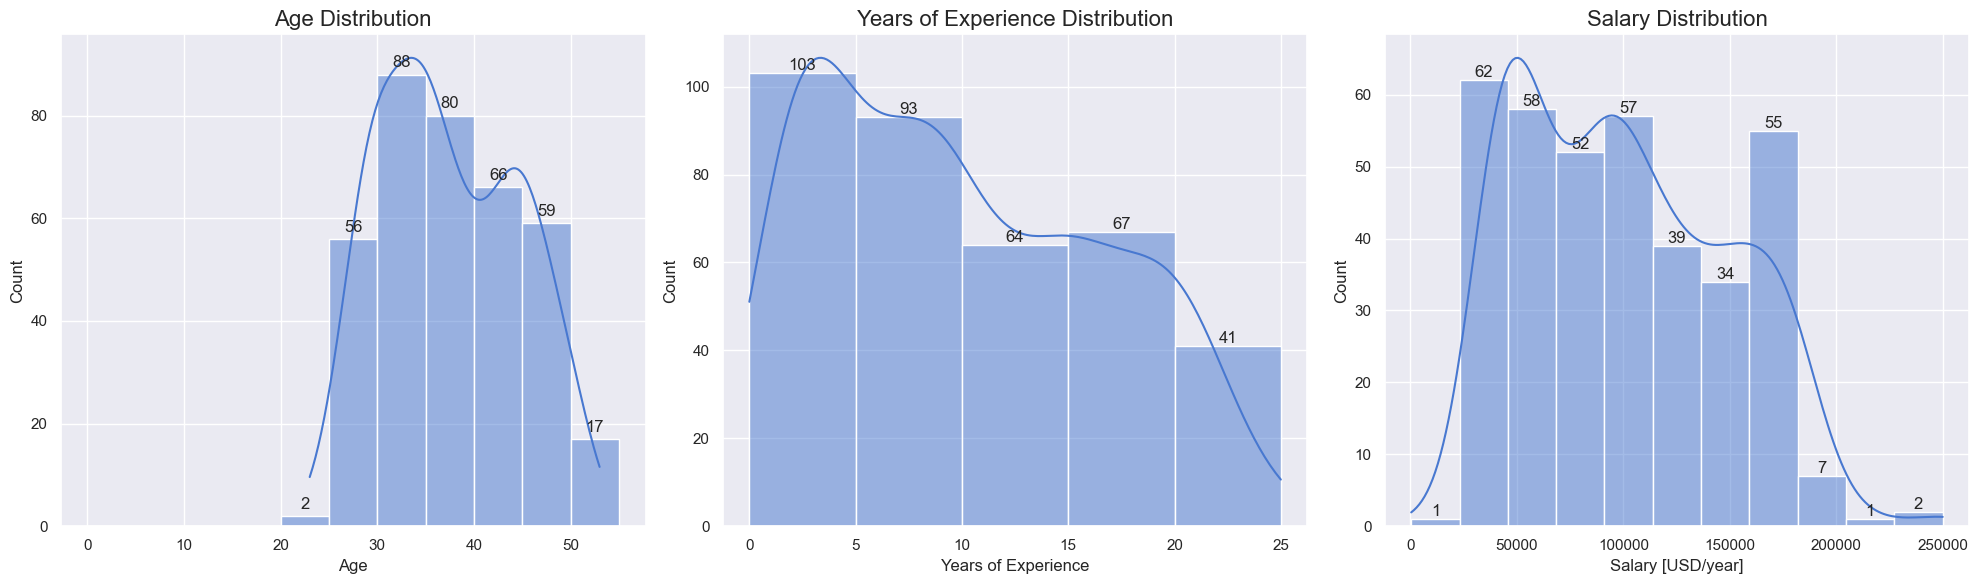

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Determine the number of bins based on Age range
max_age = df['Age'].max()
bins_age = np.arange(0, max_age + 5, 5)  # Bins every 5 years

# Age distribution plot
age_plot = sns.histplot(df['Age'], bins=bins_age, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution', fontsize=16)
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
for container in age_plot.containers:
    age_plot.bar_label(container, fmt='%d', fontsize=12, label_type='edge', padding=3, labels=[f"{h}" if h > 0 else "" for h in container.datavalues])

# Years of Experience distribution plot 
max_experience = df['Years of Experience'].max()
bins_experience = np.arange(0, max_experience + 5, 5) # Bins every 5 years
sns.histplot(df['Years of Experience'], bins=bins_experience, kde=True, ax=axes[1])
axes[1].set_title('Years of Experience Distribution', fontsize=16)
axes[1].set_xlabel('Years of Experience', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].bar_label(axes[1].containers[0], fmt='%d', fontsize=12)

# Salary distribution plot
sns.histplot(df['Salary'], kde=True, ax=axes[2])
axes[2].set_title('Salary Distribution', fontsize=16)
axes[2].set_xlabel('Salary [USD/year]', fontsize=12)
axes[2].set_ylabel('Count', fontsize=12)
axes[2].bar_label(axes[2].containers[0], fmt='%d', fontsize=12)


# Use bin edges used by Seaborn to set the grid
# counts, bin_edges = np.histogram(df['Salary'].dropna(), bins='auto')  
# axes[2].set_xticks(bin_edges)  
# axes[2].grid(True, axis='x',  alpha=0.7)  


# Adjust layout
plt.tight_layout()
plt.show()

Interquartile Range Outlier Detection for Salary

IQR Outliers: 0


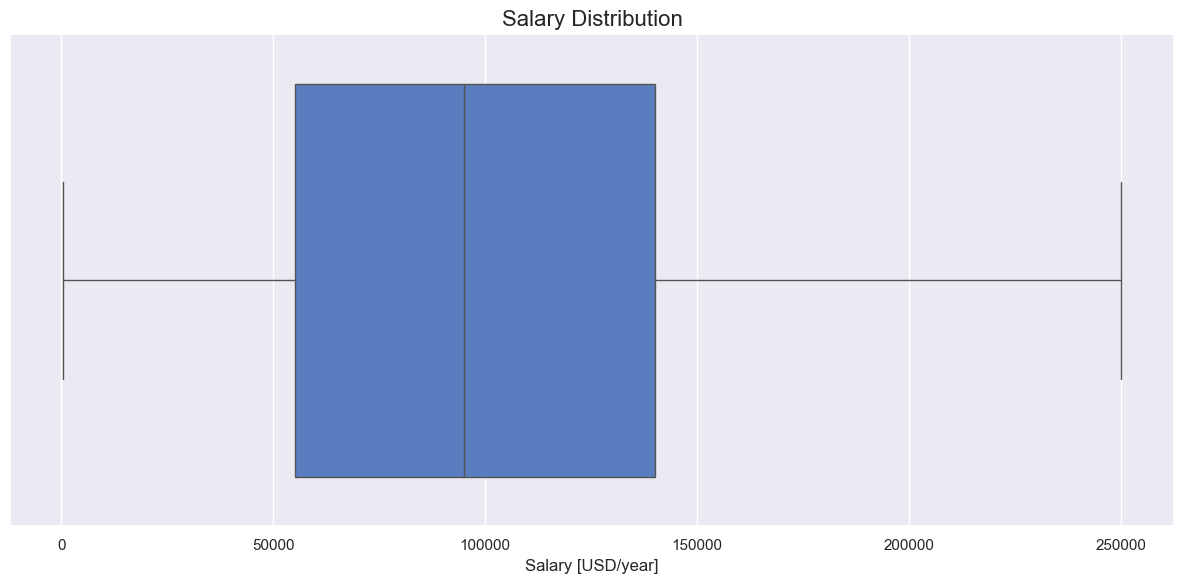

In [20]:
# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers using IQR
outliers_iqr = df[(df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)]

# Display results
print(f"IQR Outliers: {len(outliers_iqr)}")

# Boxplot to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Salary'])
plt.title("Salary Distribution", fontsize=16)
plt.xlabel('Salary [USD/year]', fontsize=12) 
plt.tight_layout()
plt.show()

## Gender distribution
- The database is balanced in Gender category.

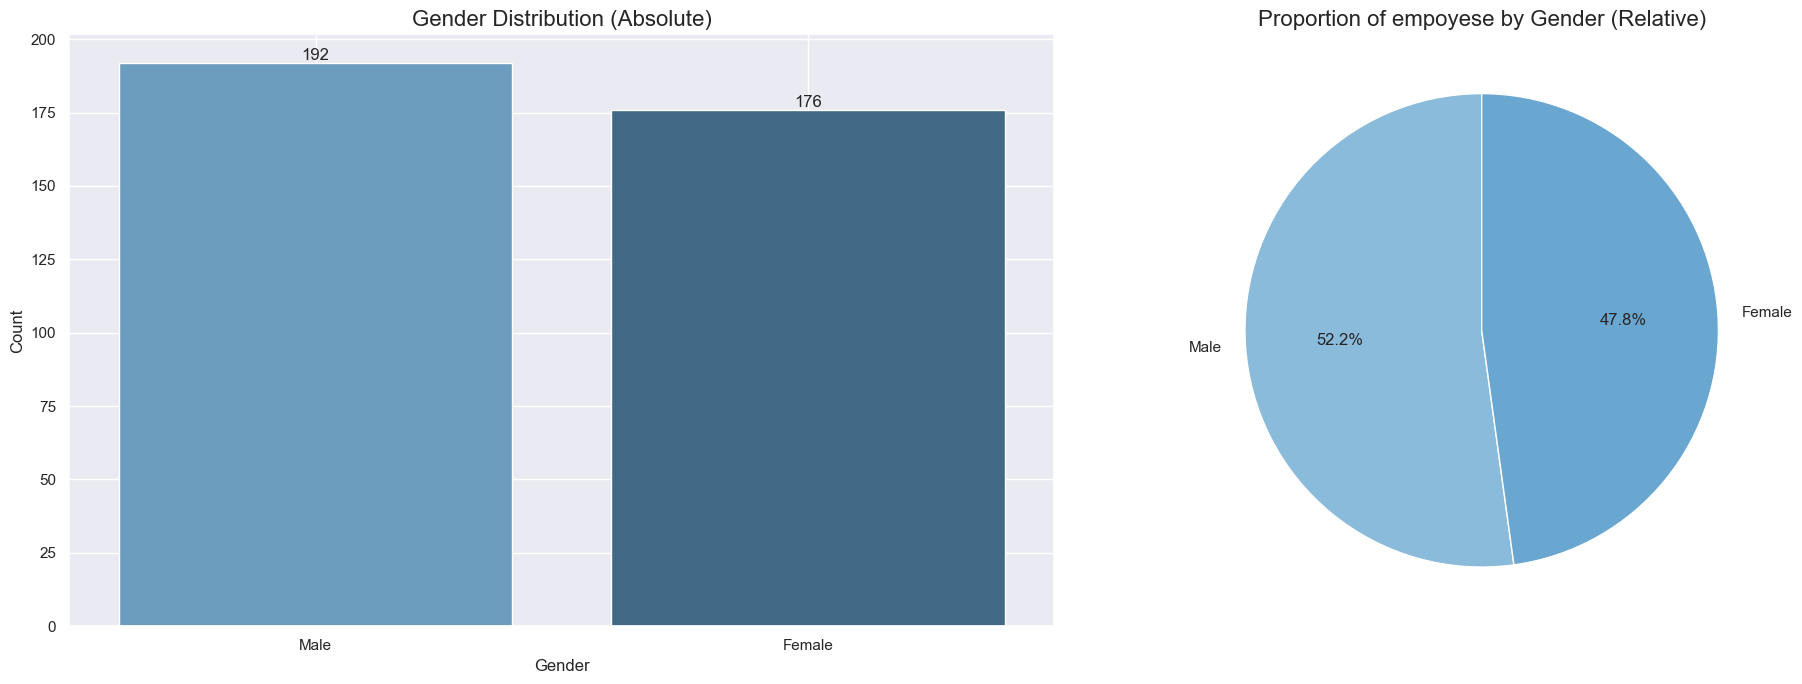

In [21]:
# Count of victims by gender
absolute_frequencies = df['Gender'].value_counts()
relative_frequencies = df['Gender'].value_counts(normalize=True) * 100

plt.figure(figsize=(20, 7))

# First Chart: Absolute count of victims by gender
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=absolute_frequencies.index, y=absolute_frequencies, palette='Blues_d')
plt.title('Gender Distribution (Absolute)', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)

# Add labels to bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', fontsize=12)

plt.grid(True)

# Second Chart: Proportion of employees by gender
plt.subplot(1, 2, 2)
plt.pie(relative_frequencies, labels=relative_frequencies.index, autopct='%.1f%%', 
        colors=sns.color_palette('Blues_d'), startangle=90, wedgeprops={'edgecolor': 'white'})
plt.title('Proportion of empoyese by Gender (Relative)', fontsize=16)

plt.tight_layout()
plt.show()

## Education level distribution
- The database has Bachelor's degree predominance.

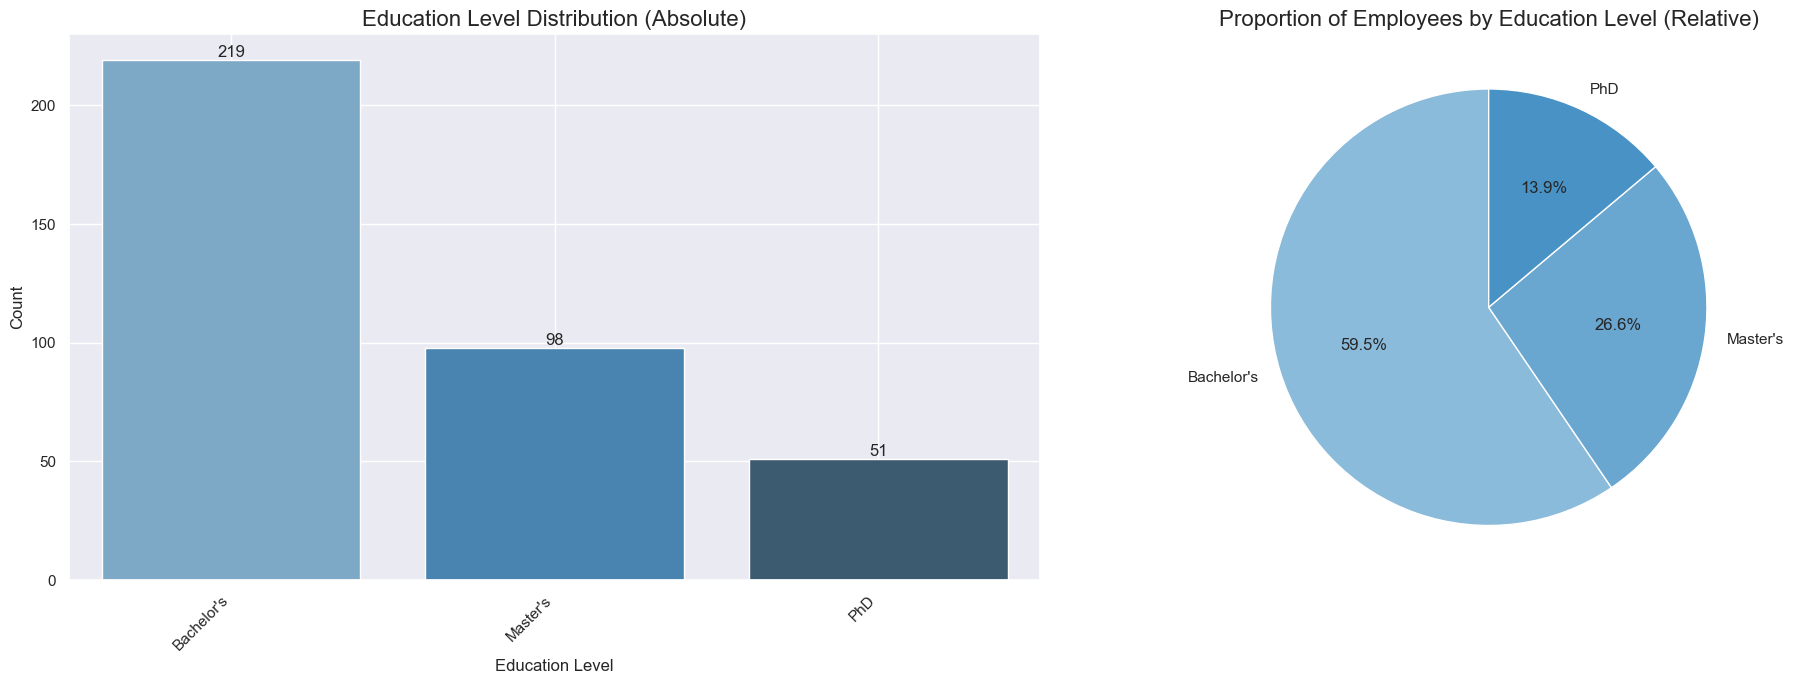

In [22]:
# Count of employees by education level
absolute_frequencies = df['Education Level'].value_counts()
relative_frequencies = df['Education Level'].value_counts(normalize=True) * 100

plt.figure(figsize=(20, 7))

# First Chart: Absolute count of employees by education level
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=absolute_frequencies.index, y=absolute_frequencies, palette='Blues_d')
plt.title('Education Level Distribution (Absolute)', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Education Level', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels to bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', fontsize=12)

plt.grid(True)

# Second Chart: Proportion of employees by education level
plt.subplot(1, 2, 2)
plt.pie(relative_frequencies, labels=relative_frequencies.index, autopct='%.1f%%', 
        colors=sns.color_palette('Blues_d'), startangle=90, wedgeprops={'edgecolor': 'white'})
plt.title('Proportion of Employees by Education Level (Relative)', fontsize=16)

plt.tight_layout()
plt.show()


## Job Title distribution
- Distribution of job titles doesn't bring much information.
- NLP was applied to this field in [NLP_Job_Titles](./1.%20NLP_Job_Tiltes.ipynb)
- Two new categories are applied, Seniority and Industry. Information is in [Procced Dataset](/./datasets/2.%20Processed%20Dataset/people.csv)
- Distribuitions shows most employees are from Marketing, Operations and Sales industries and are considered Seniors.

In [23]:
df_people_new = pd.read_csv('..\\datasets\\2. Processed Dataset\\people.csv')
df = df.merge(df_people_new[['id', 'Seniority', 'Industry']], on='id', how='left')

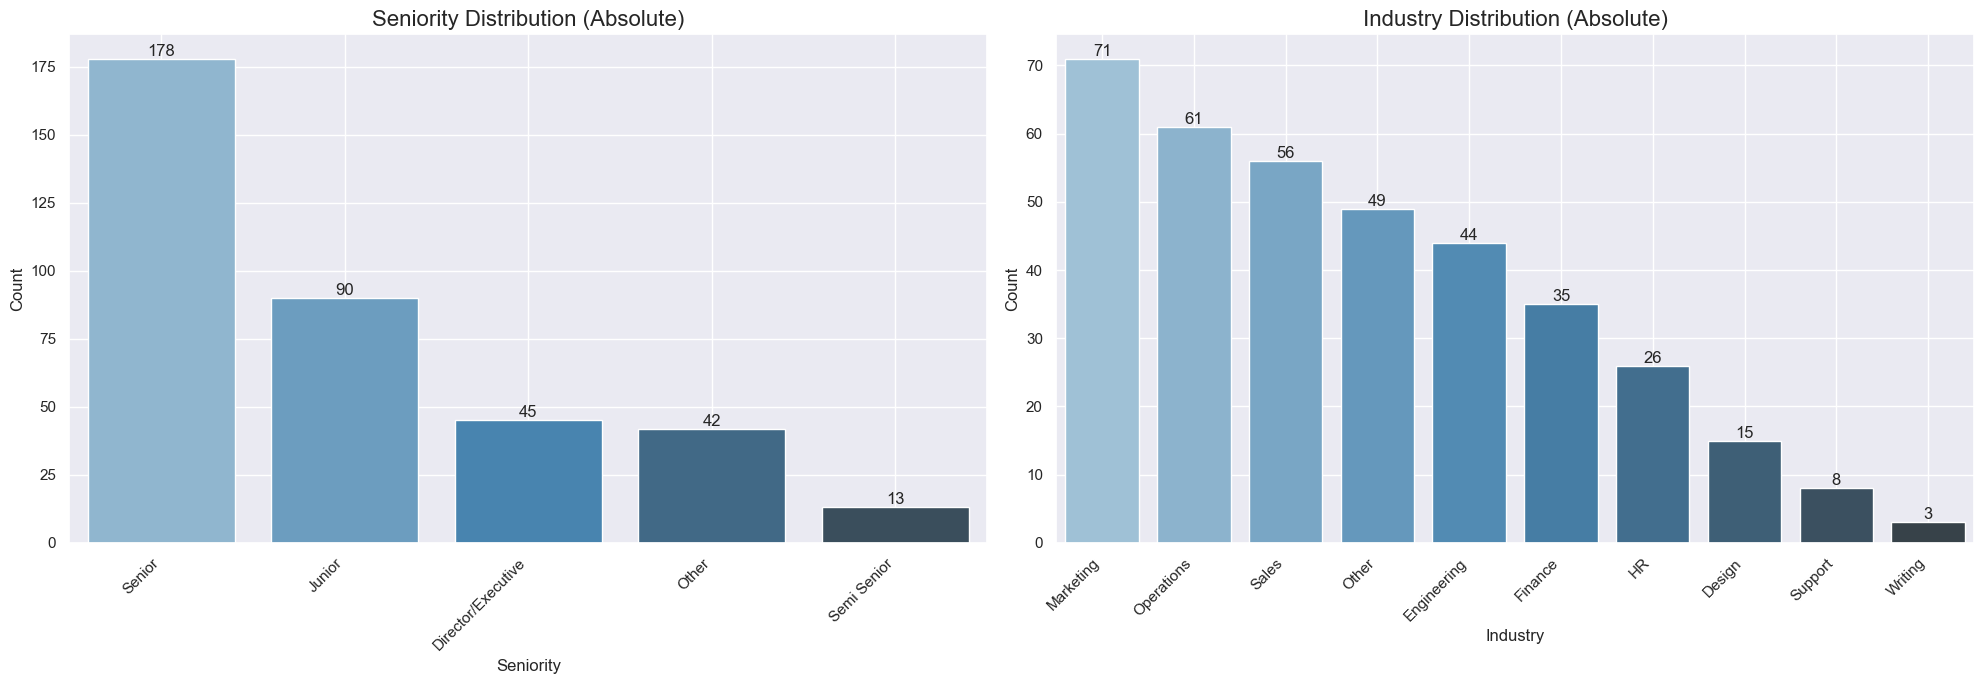

In [24]:
plt.figure(figsize=(20, 7))

# First Chart: Absolute count of employees by Seniority
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=df['Seniority'].value_counts().index, 
                   y=df['Seniority'].value_counts(), 
                   palette='Blues_d')
plt.title('Seniority Distribution (Absolute)', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Seniority', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels to bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', fontsize=12)

plt.grid(True)

# Second Chart: Absolute count of employees by Industry
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x=df['Industry'].value_counts().index, 
                   y=df['Industry'].value_counts(), 
                   palette='Blues_d')
plt.title('Industry Distribution (Absolute)', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Industry', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels to bars
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()

## Salary boxpolots
- Salary increments with Seniority and with Education Level as it will be demostrated in correlation heat map and scatter plot.

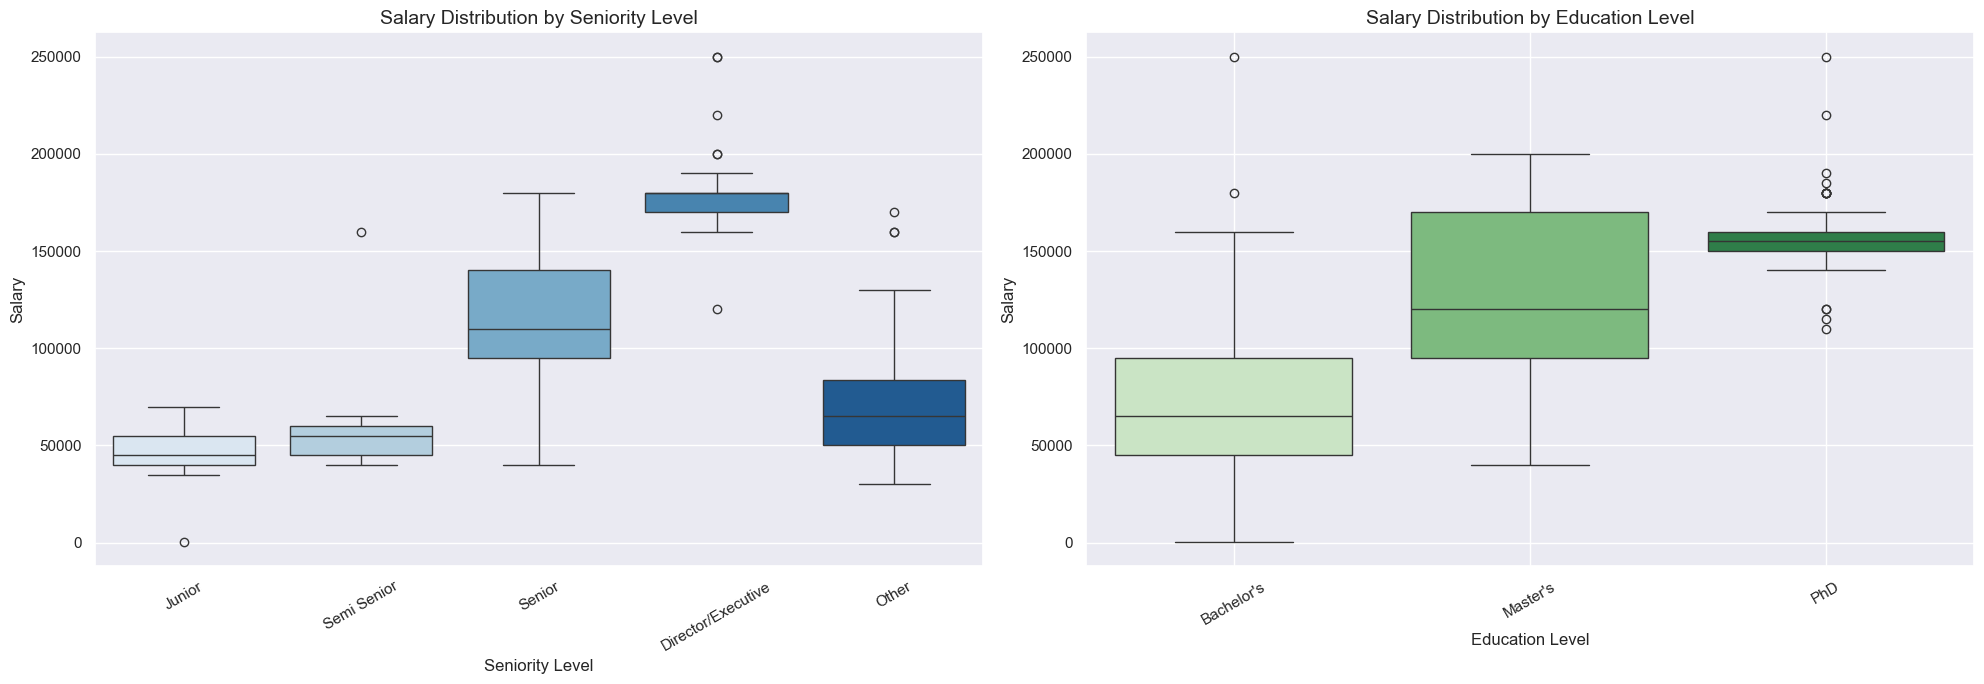

In [ ]:
# Define the custom order
custom_order_seniority  = ["Junior", "Semi Senior", "Senior", "Director/Executive", "Other"]
custom_order_education = ["Bachelor's", "Master's", "PhD"]

# Create scatter plots
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Boxplot: Salary vs Seniority
sns.boxplot(x=df["Seniority"], y=df["Salary"], order=custom_order_seniority, palette="Blues", ax=axes[0])
axes[0].set_title("Salary Boxplot by Seniority Level", fontsize=14)
axes[0].set_xlabel("Seniority Level", fontsize=12)
axes[0].set_ylabel("Salary", fontsize=12)
axes[0].tick_params(axis="x", rotation=30)

# Boxplot: Salary vs Education Level
sns.boxplot(x=df["Education Level"], y=df["Salary"], order=custom_order_education, palette="Greens", ax=axes[1])
axes[1].set_title("Salary Boxplot by Education Level", fontsize=14)
axes[1].set_xlabel("Education Level", fontsize=12)
axes[1].set_ylabel("Salary", fontsize=12)
axes[1].tick_params(axis="x", rotation=30)

# Ajustar diseño
plt.grid(True)
plt.tight_layout()
plt.show()

---
# Encode categorical features

In [26]:
# Convert Gender to numerical (label encoding)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

Education Level and Seniority have a categorlical order.

In [27]:
# Unique values of Education Level
unique_education_levels = df['Education Level'].unique()
print(unique_education_levels)

# Unique values of Seniority
unique_seniority = df['Seniority'].unique()
print(unique_seniority)

# Encode Education Level (ordinal encoding)
education_order = ["Bachelor's", "Master's", 'PhD']
df['Education Level'] = df['Education Level'].astype('category').cat.set_categories(education_order, ordered=True).cat.codes

# Encode Education Level (ordinal encoding)
seniority_order = ['Other','Junior','Semi Senior', 'Senior', 'Director/Executive']
df['Seniority'] = df['Seniority'].astype('category').cat.set_categories(seniority_order, ordered=True).cat.codes

["Bachelor's" "Master's" 'PhD']
['Other' 'Senior' 'Semi Senior' 'Director/Executive' 'Junior']


Industry is a categorlical variable.

In [ ]:
# Encode Industry (One-Hot Encoding)
df = pd.get_dummies(df, columns=['Industry'], drop_first=True)

Save df for ML model.

In [29]:
df = df.drop(columns=['Job Title', 'Description'])
df.to_csv("..\\datasets\\2. Processed Dataset\\result.csv", index=False)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    368 non-null    int64  
 1   Age                   368 non-null    float64
 2   Gender                368 non-null    int64  
 3   Education Level       368 non-null    int8   
 4   Years of Experience   368 non-null    float64
 5   Salary                368 non-null    float64
 6   Seniority             368 non-null    int8   
 7   Industry_Engineering  368 non-null    bool   
 8   Industry_Finance      368 non-null    bool   
 9   Industry_HR           368 non-null    bool   
 10  Industry_Marketing    368 non-null    bool   
 11  Industry_Operations   368 non-null    bool   
 12  Industry_Other        368 non-null    bool   
 13  Industry_Sales        368 non-null    bool   
 14  Industry_Support      368 non-null    bool   
 15  Industry_Writing      3

---
# Correlation

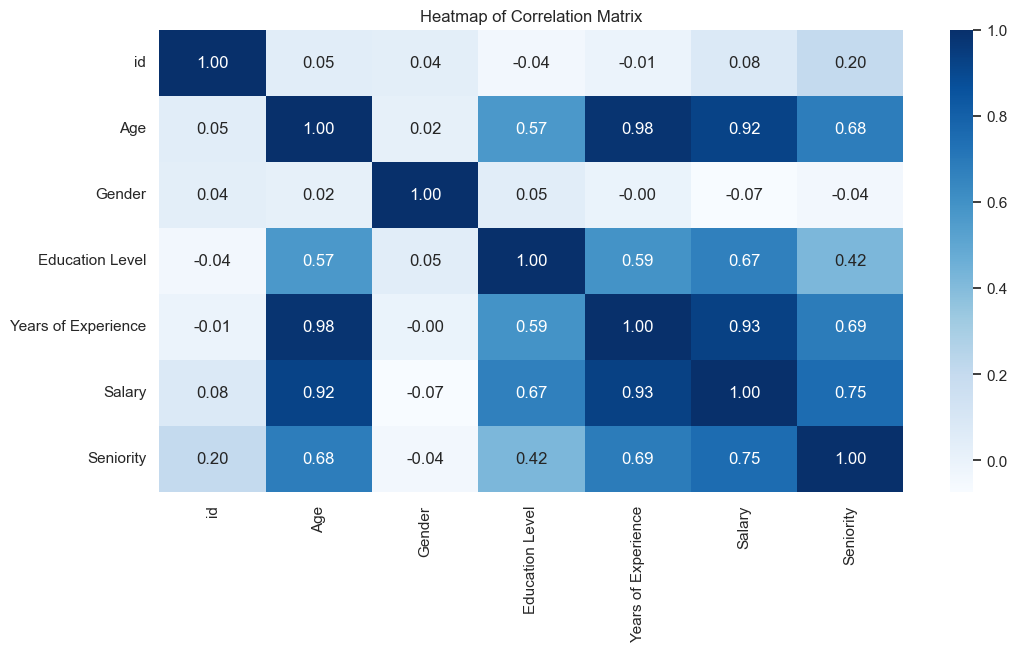

In [31]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='Blues', fmt=".2f")

# Show the plot
plt.title("Heatmap of Correlation Matrix")
plt.show()

Main variables that correlatates with Salary

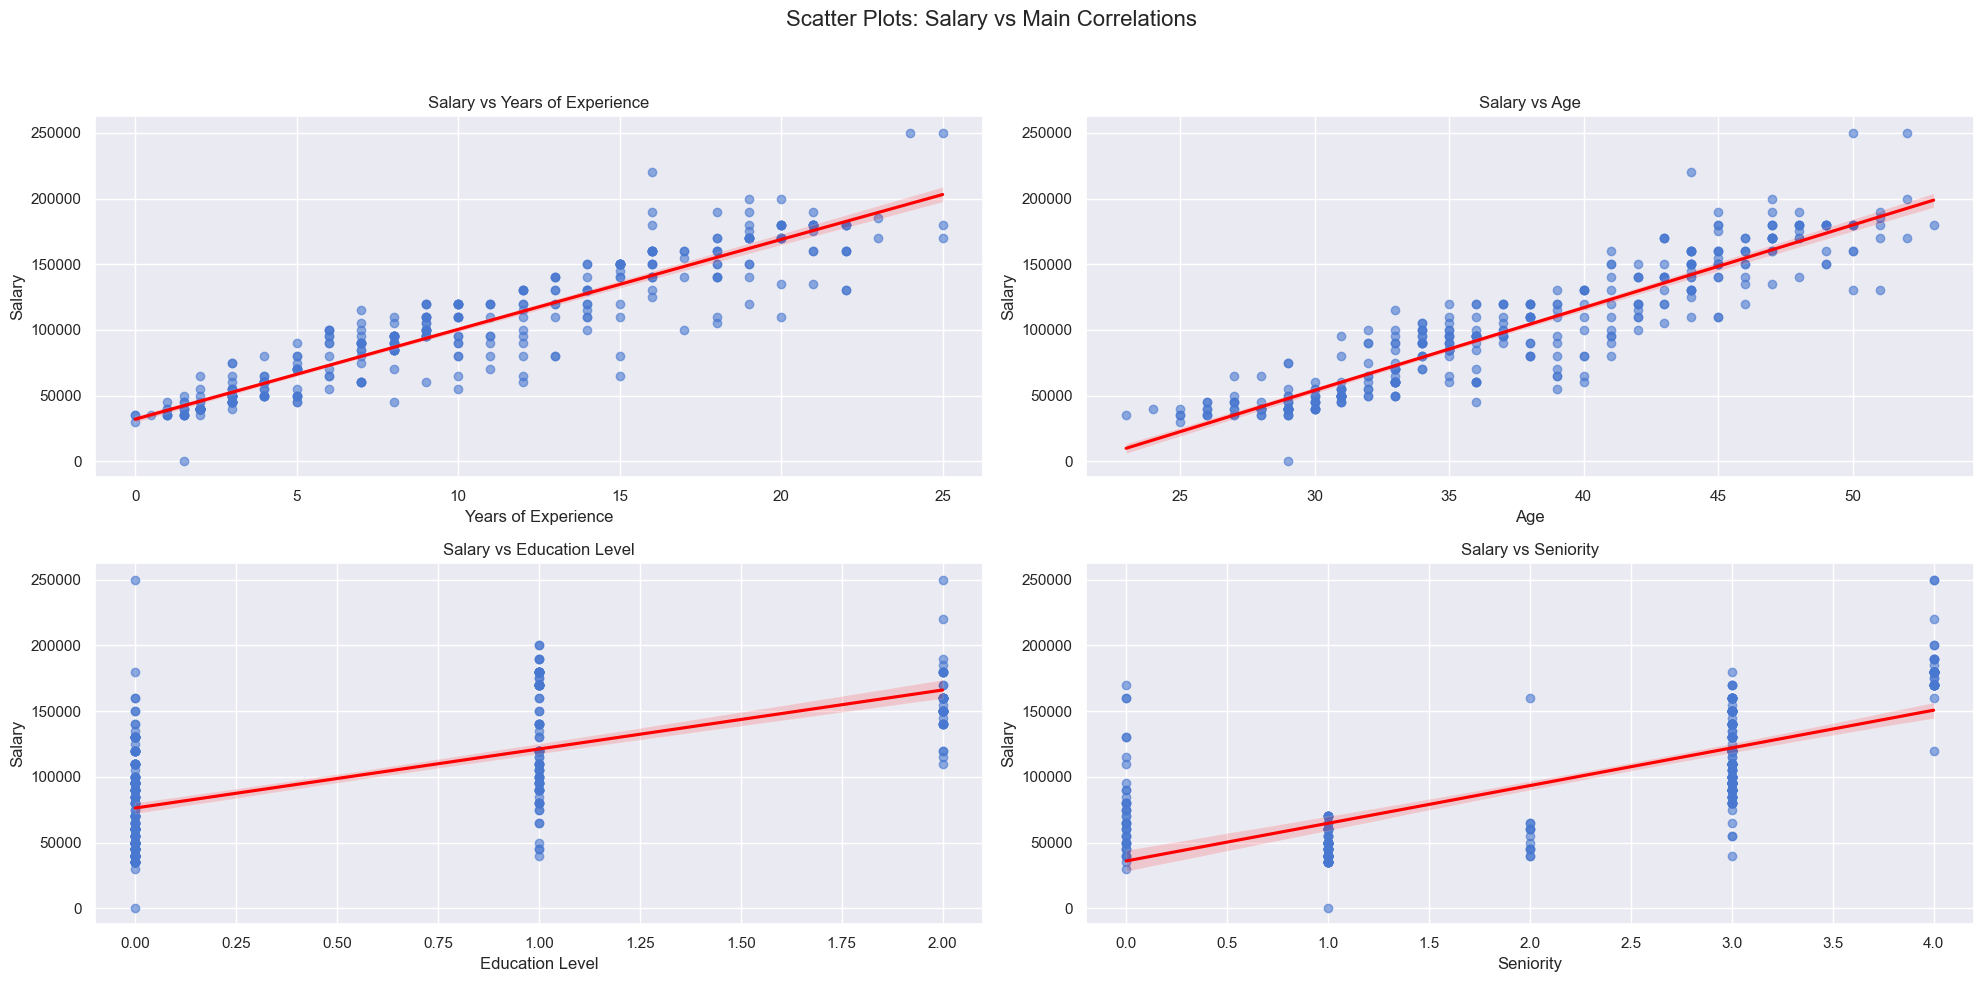

In [32]:
# Define variables with high correlation to Salary
correlation_vars = ["Years of Experience", "Age", "Education Level", "Seniority"]

# Create scatter plots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle("Scatter Plots: Salary vs Main Correlations", fontsize=16)

for ax, var in zip(axes.flat, correlation_vars):
    # Scatter plot con línea de regresión
    sns.regplot(x=df[var], y=df["Salary"], scatter_kws={'alpha':0.6}, line_kws={'color':'red'}, ax=ax)
    
    ax.set_title(f"Salary vs {var}")
    ax.set_xlabel(var)
    ax.set_ylabel("Salary")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()